# 서울시의 대기질 분석 => 전기차가 대기에 미치는 영향 분석

#### 2012~2015년, 2021년, 2022년의 데이터 형태가 같음
#### 2016~2020년의 데이터 형태가 같음

In [5]:
import pandas as pd

## 2012년

In [6]:
# 데이터 불러오는 함수 만들기
def get_2012_data(num):
    data_2012=pd.read_excel('../DATA_SUA/서울시 미세먼지 일별 평균 12년 '+str(num)+'월.xlsx') # 12년 데이터 불러오기
    #print(data_2012.head())
    data_2012.drop('Unnamed: 1', axis=1, inplace=True) # 'Unnamed: 1'열 (일자별 평균) 삭제
    data_2012.drop(index=0, inplace=True) # 0행 (서울시 평균) 삭제
    data_2012.reset_index(inplace=True)  # 2012년 데이터의 인덱스 초기화
    data_2012=data_2012.drop(columns=['index'])  # reset_index 했을 때 새로 생긴 index 열 제거

    return data_2012

# 합계와 평균 계산하는 함수
num=1
def get_sum_avg_2012(num):
    data_2012=get_2012_data(num)

    # 총 25개 '구'별로 1일~31일까지의 합계를 구해서 합계 열 생성
    data_2012['합계']=pd.DataFrame(data_2012.iloc[i][1:].sum() for i in range(25))  

    if num in [1, 3, 5, 7, 8, 10, 12]:
        data_2012['평균']=round(data_2012['합계']/31, 2)  # 1, 3, 5, 7, 8, 10, 12월은 31일까지 있으니 31로 나눠서 평균을 구함
    elif num==2:
        data_2012['평균']=round(data_2012['합계']/29, 2) # 2월은 28일까지 있으나 2012년은 윤년이라 29로 나눠서 평균을 구함
    else:
        data_2012['평균']=round(data_2012['합계']/30, 2) # 나머지 월은 30으로 나눠서 평균을 구함
    
    return data_2012

In [7]:
# 2012년 1월의 합계, 평균 열이 추가된 데이터
get_sum_avg_2012(1)

,구분,1일,2일,3일,4일,5일,6일,7일,8일,9일,...,24일,25일,26일,27일,28일,29일,30일,31일,합계,평균
0,강남구,76,93,87,65,50,55,88,83,111,...,NaN,NaN,NaN,90,38,45,36,48,1353.0,43.65
1,강동구,79,93,85,62,53,51,83,75,110,...,26.0,26.0,45.0,81,36,44,36,45,1784.0,57.55
2,강북구,69,76,80,59,45,49,72,70,98,...,24.0,24.0,40.0,72,34,40,30,39,1634.0,52.71
3,강서구,91,102,98,71,55,58,101,88,121,...,28.0,27.0,52.0,86,39,46,42,50,2056.0,66.32
4,관악구,77,88,90,65,47,49,90,77,116,...,26.0,26.0,50.0,84,35,39,34,44,1795.0,57.90
5,광진구,90,100,92,68,54,60,91,81,115,...,26.0,27.0,48.0,87,38,47,41,50,1911.0,61.65
6,구로구,83,92,91,68,48,53,90,77,122,...,26.0,27.0,49.0,81,34,42,35,42,1628.0,52.52
7,금천구,79,85,84,63,48,52,81,70,118,...,25.0,28.0,50.0,84,42,50,33,44,1796.0,57.94
8,노원구,90,100,97,66,55,55,92,91,115,...,26.0,25.0,44.0,85,34,42,33,45,1949.0,62.87
9,도봉구,84,97,90,63,48,55,88,79,109,...,25.0,22.0,42.0,80,36,44,33,41,1801.0,58.10


In [8]:
# 2012년 각 월의 평균 구하기
mean_2012=[]
for i in range(1, 13):
    mean_2012.append(get_sum_avg_2012(i)['평균'].mean())


mean_2012

[58.81600000000001,
 50.421600000000005,
 46.76919999999999,
 51.04560000000001,
 51.678000000000004,
 40.4356,
 28.033999999999995,
 21.738000000000003,
 27.221999999999998,
 32.5352,
 42.0128,
 41.2472]

In [9]:
# 2012년의 전체 평균
avg_2012=pd.DataFrame(mean_2012).mean()[0]
avg_2012

40.99626666666666

# -------------------------------------------------------------------------------------------------------------
## 2013년

In [10]:
# 데이터 불러오는 함수 만들기
def get_2013_data(num):
    data_2013=pd.read_excel('../DATA_SUA/서울시 미세먼지 일별 평균 13년 '+str(num)+'월.xlsx') # 13년 데이터 불러오기
    data_2013.head()
    data_2013.drop('Unnamed: 1', axis=1, inplace=True) # 'Unnamed: 1'열 (일자별 평균) 삭제
    data_2013.drop(index=0, inplace=True) # 0행 (서울시 평균) 삭제
    data_2013.reset_index(inplace=True)  # 2013년 데이터의 인덱스 초기화
    data_2013=data_2013.drop(columns=['index'])  # reset_index 했을 때 새로 생긴 index 열 제거

    return data_2013

# 합계와 평균 계산하는 함수
num=1
def get_sum_avg_2013(num):
    data_2013=get_2013_data(num)

    # 총 25개 구에 대해 1일~31일까지의 합계를 구해서 합계 열 생성
    data_2013['합계']=pd.DataFrame(data_2013.iloc[i][1:].sum() for i in range(25))  

    if num in [1, 3, 5, 7, 8, 10, 12]:
        data_2013['평균']=round(data_2013['합계']/31, 2)  # 1, 3, 5, 7, 8, 10, 12월은 31일까지 있으니 31로 나눠서 평균을 구함
    elif num==2:
        data_2013['평균']=round(data_2013['합계']/28, 2) # 2월은 28일까지 있으니 28로 나눠서 평균을 구함
    else:
        data_2013['평균']=round(data_2013['합계']/30, 2) # 나머지 월은 30으로 나눠서 평균을 구함
    
    return data_2013

In [11]:
# 2013년 1월의 합계, 평균 열이 추가된 데이터
get_sum_avg_2013(1)

,구분,1일,2일,3일,4일,5일,6일,7일,8일,9일,...,24일,25일,26일,27일,28일,29일,30일,31일,합계,평균
0,강남구,38,20,31,48,64,85.0,76,71,33,...,64.0,31.0,34.0,35.0,57.0,72.0,75.0,78.0,2076.0,66.97
1,강동구,33,15,29,51,59,72.0,69,65,30,...,56.0,25.0,27.0,36.0,54.0,61.0,64.0,67.0,1920.0,61.94
2,강북구,27,14,21,31,44,63.0,51,60,28,...,62.0,28.0,31.0,36.0,58.0,66.0,73.0,76.0,1936.0,62.45
3,강서구,36,18,30,43,59,91.0,83,75,35,...,65.0,30.0,31.0,32.0,49.0,67.0,76.0,73.0,1980.0,63.87
4,관악구,36,19,27,36,56,82.0,71,59,28,...,59.0,24.0,25.0,29.0,44.0,71.0,80.0,80.0,1861.0,60.03
5,광진구,35,21,30,50,59,83.0,75,72,31,...,64.0,32.0,31.0,35.0,56.0,60.0,63.0,70.0,2028.0,65.42
6,구로구,39,19,31,40,56,86.0,79,68,32,...,66.0,31.0,29.0,33.0,49.0,76.0,81.0,83.0,2018.0,65.10
7,금천구,43,21,35,42,58,88.0,77,68,38,...,65.0,29.0,30.0,34.0,47.0,64.0,67.0,78.0,2023.0,65.26
8,노원구,36,19,30,48,64,88.0,76,80,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1264.0,40.77
9,도봉구,31,14,29,47,60,87.0,73,73,29,...,56.0,24.0,28.0,31.0,52.0,61.0,65.0,68.0,1897.0,61.19


In [12]:
# 2013년 1월의 총 평균
get_sum_avg_2013(1)['평균'].mean()

62.29880000000001

In [13]:
# 2013년 각 월의 평균 구하기
mean_2013=[]
for i in range(1, 13):
    mean_2013.append(get_sum_avg_2013(i)['평균'].mean())


mean_2013

[62.29880000000001,
 44.5928,
 55.385599999999975,
 52.092000000000006,
 54.27399999999999,
 40.0748,
 34.129999999999995,
 34.798,
 28.1032,
 29.06,
 42.4836,
 55.180400000000006]

In [14]:
# 2013년의 전체 평균
avg_2013=pd.DataFrame(mean_2013).mean()[0]
avg_2013

44.37276666666667

# -----------------------------------------------------------------------------------------------------
## 2014년

In [15]:
# 데이터 불러오는 함수 만들기
def get_2014_data(num):
    data_2014=pd.read_excel('../DATA_SUA/서울시 미세먼지 일별 평균 14년 '+str(num)+'월.xlsx') # 14년 데이터 불러오기
    data_2014.head()
    data_2014.drop('Unnamed: 1', axis=1, inplace=True) # 'Unnamed: 1'열 (일자별 평균) 삭제
    data_2014.drop(index=0, inplace=True) # 0행 (서울시 평균) 삭제
    data_2014.reset_index(inplace=True)  # 2014년 데이터의 인덱스 초기화
    data_2014=data_2014.drop(columns=['index'])  # reset_index 했을 때 새로 생긴 index 열 제거

    return data_2014

# 합계와 평균 계산하는 함수
num=1
def get_sum_avg_2014(num):
    data_2014=get_2014_data(num)

    # 총 25개 구에 대해 1일~31일까지의 합계를 구해서 합계 열 생성
    data_2014['합계']=pd.DataFrame(data_2014.iloc[i][1:].sum() for i in range(25))  

    if num in [1, 3, 5, 7, 8, 10, 12]:
        data_2014['평균']=round(data_2014['합계']/31, 2)  # 1, 3, 5, 7, 8, 10, 12월은 31일까지 있으니 31로 나눠서 평균을 구함
    elif num==2:
        data_2014['평균']=round(data_2014['합계']/28, 2) # 2월은 28일까지 있으니 28로 나눠서 평균을 구함
    else:
        data_2014['평균']=round(data_2014['합계']/30, 2) # 나머지 월은 30으로 나눠서 평균을 구함
    
    return data_2014

In [16]:
# 2014년 1월의 합계, 평균 열이 추가된 데이터
get_sum_avg_2014(1)

,구분,1일,2일,3일,4일,5일,6일,7일,8일,9일,...,24일,25일,26일,27일,28일,29일,30일,31일,합계,평균
0,강남구,117,54,59,49,42,72,87,75,20,...,64,51,35,37,31,44,42,24,1806,58.26
1,강동구,118,56,57,50,46,63,87,71,18,...,64,52,36,41,37,47,45,24,1807,58.29
2,강북구,117,48,65,44,42,64,88,70,18,...,64,54,35,35,30,40,40,22,1811,58.42
3,강서구,116,55,63,39,43,77,94,69,19,...,57,50,32,39,27,46,39,26,1845,59.52
4,관악구,124,56,63,44,44,75,92,77,21,...,60,61,36,38,31,43,42,24,1901,61.32
5,광진구,132,57,63,52,49,63,96,83,25,...,65,56,40,42,39,45,48,25,1976,63.74
6,구로구,123,56,62,40,41,57,89,71,23,...,60,50,34,37,28,42,41,24,1821,58.74
7,금천구,113,52,53,39,38,63,74,68,20,...,39,48,33,33,30,33,38,22,1648,53.16
8,노원구,109,43,56,40,40,61,75,47,18,...,59,48,33,37,28,39,38,21,1677,54.10
9,도봉구,119,43,59,44,42,60,81,65,18,...,65,44,33,36,29,40,40,20,1735,55.97


In [17]:
# 2014년 1월의 총 평균
get_sum_avg_2014(1)['평균'].mean()

56.9948

In [18]:
# 2014년 각 월의 평균 구하기
mean_2014=[]
for i in range(1, 13):
    mean_2014.append(get_sum_avg_2014(i)['평균'].mean())


mean_2014

[56.9948,
 56.8396,
 60.15639999999999,
 57.401199999999996,
 62.5872,
 38.0436,
 38.4124,
 29.383599999999998,
 28.869600000000002,
 33.44119999999999,
 44.525600000000004,
 37.745599999999996]

In [19]:
# 2014년의 전체 평균
avg_2014=pd.DataFrame(mean_2014).mean()[0]
avg_2014

45.36673333333332

# ------------------------------------------------------------------------------------------------------------
## 2015년

In [20]:
# 데이터 불러오는 함수 만들기
def get_2015_data(num):
    data_2015=pd.read_excel('../DATA_SUA/서울시 미세먼지 일별 평균 15년 '+str(num)+'월.xlsx') # 15년 데이터 불러오기
    data_2015.head()
    data_2015.drop('Unnamed: 1', axis=1, inplace=True) # 'Unnamed: 1'열 (일자별 평균) 삭제
    data_2015.drop(index=0, inplace=True) # 0행 (서울시 평균) 삭제
    data_2015.reset_index(inplace=True)  # 2015년 데이터의 인덱스 초기화
    data_2015=data_2015.drop(columns=['index'])  # reset_index 했을 때 새로 생긴 index 열 제거

    return data_2015

# 합계와 평균 계산하는 함수
num=1
def get_sum_avg_2015(num):
    data_2015=get_2015_data(num)

    # 총 25개 구에 대해 1일~31일까지의 합계를 구해서 합계 열 생성
    data_2015['합계']=pd.DataFrame(data_2015.iloc[i][1:].sum() for i in range(25))  

    if num in [1, 3, 5, 7, 8, 10, 12]:
        data_2015['평균']=round(data_2015['합계']/31, 2)  # 1, 3, 5, 7, 8, 10, 12월은 31일까지 있으니 31로 나눠서 평균을 구함
    elif num==2:
        data_2015['평균']=round(data_2015['합계']/28, 2) # 2월은 28일까지 있으니 28로 나눠서 평균을 구함
    else:
        data_2015['평균']=round(data_2015['합계']/30, 2) # 나머지 월은 30으로 나눠서 평균을 구함
    
    return data_2015

In [21]:
# 2015년 1월의 합계, 평균 열이 추가된 데이터
get_sum_avg_2015(1)

,구분,1일,2일,3일,4일,5일,6일,7일,8일,9일,...,24일,25일,26일,27일,28일,29일,30일,31일,합계,평균
0,강남구,66,30,39,40,74,40,35,44,55,...,56,62,42,51,46,52,40,41,1537,49.58
1,강동구,63,27,39,37,71,36,31,49,55,...,60,57,37,50,46,53,36,42,1473,47.52
2,강북구,63,26,36,43,75,37,31,46,51,...,51,61,40,50,42,49,37,39,1493,48.16
3,강서구,60,30,35,43,79,38,34,42,46,...,55,57,41,41,42,54,35,38,1569,50.61
4,관악구,60,30,37,53,90,44,34,42,52,...,57,69,45,50,45,54,40,43,1635,52.74
5,광진구,76,31,41,38,72,40,35,52,59,...,57,58,37,54,47,50,39,45,1546,49.87
6,구로구,64,30,36,45,76,40,35,41,51,...,53,61,42,45,42,48,39,38,1538,49.61
7,금천구,60,29,34,40,75,39,34,39,46,...,49,55,41,44,42,48,37,36,1476,47.61
8,노원구,70,29,39,45,83,40,33,52,51,...,56,68,42,53,47,57,38,43,1605,51.77
9,도봉구,73,27,35,40,75,37,33,50,49,...,47,59,36,49,44,50,37,41,1494,48.19


In [22]:
# 2015년 1월의 총 평균
get_sum_avg_2015(1)['평균'].mean()

49.0336

In [23]:
# 2015년 각 월의 평균 구하기
mean_2015=[]
for i in range(1, 13):
    mean_2015.append(get_sum_avg_2015(i)['평균'].mean())


mean_2015

[49.0336,
 83.6268,
 70.6244,
 44.6704,
 44.83920000000001,
 34.6152,
 29.607600000000005,
 32.304,
 26.227199999999993,
 44.9432,
 32.9092,
 48.008]

In [24]:
# 2015년의 전체 평균
avg_2015=pd.DataFrame(mean_2015).mean()[0]
avg_2015

45.1174

# 2016년

In [25]:
# 2016년의 대기 정보 파일 불러오기
import pandas as pd

data_2016=pd.read_excel('../DATA_SUA/기간별_일평균_대기환경_정보_2016년.xlsx')
data_2016.head()

,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,20160101,동북권,광진구,85,64,0.004,0.046,0.9,0.006
1,20160101,동남권,강남구,73,44,0.006,0.047,0.8,0.006
2,20160101,서남권,강서구,66,38,0.005,0.048,0.9,0.006
3,20160101,서남권,구로구,56,41,0.007,0.038,1.1,0.007
4,20160101,동북권,성북구,71,45,0.005,0.056,1.3,0.007


In [26]:
# 2016년의 대기 정보 요약
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9148 entries, 0 to 9147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일자          9148 non-null   int64  
 1   권역명           9148 non-null   object 
 2   측정소명          9148 non-null   object 
 3   미세먼지(㎍/㎥)     9148 non-null   int64  
 4   초미세먼지(㎍/㎥)    9148 non-null   int64  
 5   오존(ppm)       9148 non-null   float64
 6   이산화질소농도(ppm)  9148 non-null   float64
 7   일산화탄소농도(ppm)  9148 non-null   float64
 8   아황산가스농도(ppm)  9148 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 643.3+ KB


In [27]:
# 미세먼지만 비교해보기 위해 측정일시와 미세먼지 열 추출
df_2016=data_2016[['측정일자', '미세먼지(㎍/㎥)']]
df_2016.head()

,측정일자,미세먼지(㎍/㎥)
0,20160101,85
1,20160101,73
2,20160101,66
3,20160101,56
4,20160101,71


In [28]:
# 측정일시를 datetime 형식으로 변환
df_2016['datetime']=pd.to_datetime(df_2016['측정일자'], format='%Y%m%d')

C:\Users\User\AppData\Local\Temp\ipykernel_5256\3552931538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['datetime']=pd.to_datetime(df_2016['측정일자'], format='%Y%m%d')


In [29]:
df_2016.head()

,측정일자,미세먼지(㎍/㎥),datetime
0,20160101,85,2016-01-01
1,20160101,73,2016-01-01
2,20160101,66,2016-01-01
3,20160101,56,2016-01-01
4,20160101,71,2016-01-01


In [30]:
# datetime에서 월을 추출해 month 열 생성
df_2016['month']=df_2016['datetime'].dt.month

C:\Users\User\AppData\Local\Temp\ipykernel_5256\3956437970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['month']=df_2016['datetime'].dt.month


In [31]:
df_2016.head()

,측정일자,미세먼지(㎍/㎥),datetime,month
0,20160101,85,2016-01-01,1
1,20160101,73,2016-01-01,1
2,20160101,66,2016-01-01,1
3,20160101,56,2016-01-01,1
4,20160101,71,2016-01-01,1


In [32]:
# 2016년의 각 월의 미세먼지 평균 구하기

dust_total=0
dust_list=[]  # 1월부터 12월까지의 각 월의 미세먼지 합계를 위한 빈 리스트
dust_count_list=[]  # 1월부터 12월까지의 각 월의 행 개수를 위한 빈 리스트
for i in range(1, 13):
    dust_list.append(df_2016[df_2016['month']==i]['미세먼지(㎍/㎥)'].sum())  # month가 i인 월의 미세먼지 합계
    dust_count_list.append(df_2016[df_2016['month']==i].shape[0])   # month가 i인 월의 행 개수

print(dust_list)
print(dust_count_list)

dust_avg_2016=[]  # 2016년의 각 월의 미세먼지 평균을 위한 빈 리스트
for i in range(len(dust_list)):
    dust_avg_2016.append(dust_list[i]/dust_count_list[0])  # 2016년의 각 월의 평균 구하기
print(dust_avg_2016)

[38588, 32015, 49574, 52635, 43207, 33852, 25672, 26524, 27436, 28052, 38173, 36925]
[775, 723, 775, 750, 775, 750, 775, 775, 750, 775, 750, 775]
[49.79096774193548, 41.30967741935484, 63.96645161290323, 67.91612903225807, 55.75096774193548, 43.68, 33.12516129032258, 34.22451612903226, 35.40129032258064, 36.196129032258064, 49.255483870967744, 47.645161290322584]


<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


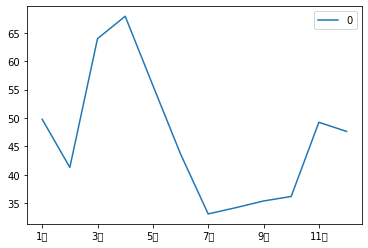

In [33]:
# 2016년의 그래프를 선그래프로 그려봤음
pd.DataFrame(dust_avg_2016, index=[str(i)+'월' for i in range(1, 13)]).plot()

In [34]:
# 2016년의 총 평균
avg_2016=pd.DataFrame(dust_avg_2016).mean()[0]
avg_2016

46.52182795698925

# -------------------------------------------------------------------------------------------------------
## 2017년

In [35]:
# 2017년의 대기 정보 파일 불러오기
import pandas as pd

data_2017=pd.read_excel('../DATA_SUA/기간별_일평균_대기환경_정보_2017년.xlsx')
data_2017.head()

,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,20170101,도심권,중구,81,64,0.003,0.057,1.0,0.005
1,20170101,도심권,용산구,77,73,0.003,0.039,1.1,0.005
2,20170101,도심권,종로구,82,67,0.003,0.054,1.0,0.004
3,20170101,서북권,서대문구,91,50,0.008,0.039,0.8,0.005
4,20170101,서북권,은평구,70,46,0.005,0.042,0.7,0.006


In [36]:
# 2017년의 대기 정보 요약
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일자          9125 non-null   int64  
 1   권역명           9125 non-null   object 
 2   측정소명          9125 non-null   object 
 3   미세먼지(㎍/㎥)     9125 non-null   int64  
 4   초미세먼지(㎍/㎥)    9125 non-null   int64  
 5   오존(ppm)       9125 non-null   float64
 6   이산화질소농도(ppm)  9125 non-null   float64
 7   일산화탄소농도(ppm)  9125 non-null   float64
 8   아황산가스농도(ppm)  9125 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 641.7+ KB


In [37]:
# 미세먼지만 비교해보기 위해 측정일시와 미세먼지 열 추출
df_2017=data_2017[['측정일자', '미세먼지(㎍/㎥)']]
df_2017.head()

,측정일자,미세먼지(㎍/㎥)
0,20170101,81
1,20170101,77
2,20170101,82
3,20170101,91
4,20170101,70


In [38]:
# 측정일시를 datetime 형식으로 변환
df_2017['datetime']=pd.to_datetime(df_2017['측정일자'], format='%Y%m%d')

C:\Users\User\AppData\Local\Temp\ipykernel_5256\2291596040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['datetime']=pd.to_datetime(df_2017['측정일자'], format='%Y%m%d')


In [39]:
# datetime에서 월을 추출해 month 열 생성
df_2017['month']=df_2017['datetime'].dt.month

C:\Users\User\AppData\Local\Temp\ipykernel_5256\3825717472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['month']=df_2017['datetime'].dt.month


In [40]:
df_2017.head()

,측정일자,미세먼지(㎍/㎥),datetime,month
0,20170101,81,2017-01-01,1
1,20170101,77,2017-01-01,1
2,20170101,82,2017-01-01,1
3,20170101,91,2017-01-01,1
4,20170101,70,2017-01-01,1


In [41]:
dust_total=0
dust_list=[]  # 1월부터 12월까지의 각 월의 미세먼지 합계를 위한 빈 리스트
dust_count_list=[]  # 1월부터 12월까지의 각 월의 행 개수를 위한 빈 리스트
for i in range(1, 13):
    dust_list.append(df_2017[df_2017['month']==i]['미세먼지(㎍/㎥)'].sum())  # month가 i인 월의 미세먼지 합계
    dust_count_list.append(df_2017[df_2017['month']==i].shape[0])   # month가 i인 월의 행 개수

print(dust_list)
print(dust_count_list)

dust_avg_2017=[]  # 2017년의 각 월의 미세먼지 평균을 위한 빈 리스트
for i in range(len(dust_list)):
    dust_avg_2017.append(dust_list[i]/dust_count_list[0])  # 2017년의 각 월의 평균 구하기
print(dust_avg_2017)

[41023, 32091, 46274, 41838, 48624, 30803, 25466, 16548, 24173, 22539, 31241, 37856]
[775, 700, 775, 750, 775, 750, 775, 775, 750, 775, 750, 775]
[52.93290322580645, 41.40774193548387, 59.708387096774196, 53.98451612903226, 62.740645161290324, 39.7458064516129, 32.85935483870968, 21.35225806451613, 31.190967741935484, 29.08258064516129, 40.310967741935485, 48.84645161290322]


In [42]:
# 2017년의 총 평균
avg_2017=pd.DataFrame(dust_avg_2017).mean()[0]
avg_2017

42.84688172043011

# ------------------------------------------------------------------------------------------------

## 2018년

In [43]:
# 2018년의 대기 정보 파일 불러오기
import pandas as pd

data_2018=pd.read_excel('../DATA_SUA/일별평균대기오염도_2018.xlsx')
data_2018.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20180101,강남구,0.033,0.010,0.6,0.006,34.0,22.0
1,20180101,강남대로,0.040,0.007,0.8,0.006,NaN,17.0
2,20180101,강동구,0.038,0.010,0.7,0.005,48.0,24.0
3,20180101,강변북로,0.033,0.008,0.6,0.005,48.0,15.0
4,20180101,강북구,0.026,0.018,0.6,0.004,38.0,18.0


In [44]:
# 2018년의 대기 정보 요약
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12447 entries, 0 to 12446
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          12447 non-null  int64  
 1   측정소명          12447 non-null  object 
 2   이산화질소농도(ppm)  12215 non-null  float64
 3   오존농도(ppm)     12207 non-null  float64
 4   이산화탄소농도(ppm)  12151 non-null  float64
 5   아황산가스(ppm)    12200 non-null  float64
 6   미세먼지(㎍/㎥)     12103 non-null  float64
 7   초미세먼지(㎍/㎥)    12109 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 778.1+ KB


In [45]:
# 미세먼지만 비교해보기 위해 측정일시와 미세먼지 열 추출
df_2018=data_2018[['측정일시', '미세먼지(㎍/㎥)']]
df_2018.head()

,측정일시,미세먼지(㎍/㎥)
0,20180101,34.0
1,20180101,NaN
2,20180101,48.0
3,20180101,48.0
4,20180101,38.0


In [46]:
# 측정일시를 datetime 형식으로 변환
df_2018['datetime']=pd.to_datetime(df_2018['측정일시'], format='%Y%m%d')

C:\Users\User\AppData\Local\Temp\ipykernel_5256\2287286723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['datetime']=pd.to_datetime(df_2018['측정일시'], format='%Y%m%d')


In [47]:
df_2018.head()

,측정일시,미세먼지(㎍/㎥),datetime
0,20180101,34.0,2018-01-01
1,20180101,NaN,2018-01-01
2,20180101,48.0,2018-01-01
3,20180101,48.0,2018-01-01
4,20180101,38.0,2018-01-01


In [48]:
# datetime에서 월을 추출해 month 열 생성
df_2018['month']=df_2018['datetime'].dt.month

C:\Users\User\AppData\Local\Temp\ipykernel_5256\3339150689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month']=df_2018['datetime'].dt.month


In [49]:
df_2018.head()

,측정일시,미세먼지(㎍/㎥),datetime,month
0,20180101,34.0,2018-01-01,1
1,20180101,NaN,2018-01-01,1
2,20180101,48.0,2018-01-01,1
3,20180101,48.0,2018-01-01,1
4,20180101,38.0,2018-01-01,1


In [50]:
dust_total=0
dust_list=[]  # 1월부터 12월까지의 각 월의 미세먼지 합계를 위한 빈 리스트
dust_count_list=[]  # 1월부터 12월까지의 각 월의 행 개수를 위한 빈 리스트
for i in range(1, 13):
    dust_list.append(df_2018[df_2018['month']==i]['미세먼지(㎍/㎥)'].sum())  # month가 i인 월의 미세먼지 합계
    dust_count_list.append(df_2018[df_2018['month']==i].shape[0])   # month가 i인 월의 행 개수

print(dust_list)
print(dust_count_list)

dust_avg_2018=[]  # 2018년의 각 월의 미세먼지 평균을 위한 빈 리스트
for i in range(len(dust_list)):
    dust_avg_2018.append(dust_list[i]/dust_count_list[0])  # 2018년의 각 월의 평균 구하기
print(dust_avg_2018)

[64420.0, 58132.0, 33212.0, 42537.0, 33068.0, 12927.0, 28819.0, 28872.0, 23688.0, 33394.0, 69712.0, 61754.0]
[1209, 1053, 780, 819, 819, 273, 1131, 1209, 1170, 1209, 1349, 1426]
[53.28370554177006, 48.08271298593879, 27.470636889991727, 35.18362282878412, 27.351530190239867, 10.692307692307692, 23.83705541770058, 23.88089330024814, 19.59305210918114, 27.62117452440033, 57.66087675765095, 51.07857733664185]


<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


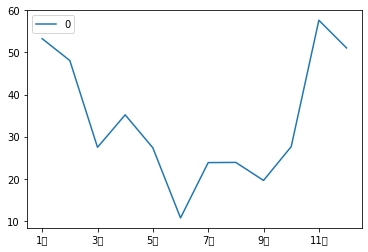

In [51]:
# 2018년의 그래프를 선그래프로 그려봤음
pd.DataFrame(dust_avg_2018, index=[str(i)+'월' for i in range(1, 13)]).plot()

In [52]:
# 2018년의 총 평균
avg_2018=pd.DataFrame(dust_avg_2018).mean()[0]
avg_2018

33.81134546457127

# -----------------------------------------------------------------------------------------------------------
# 2019년

In [53]:
# 2019년의 대기 정보 파일 불러오기
import pandas as pd

data_2019=pd.read_csv('../DATA_SUA/일별평균대기오염도_2019.csv', encoding='CP949')
data_2019.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20190101,강남구,0.028,0.012,0.6,0.005,37.0,31.0
1,20190101,강남대로,0.041,0.010,0.9,0.004,40.0,28.0
2,20190101,강동구,0.040,0.010,0.8,0.005,43.0,32.0
3,20190101,강변북로,0.048,0.009,0.5,0.005,45.0,27.0
4,20190101,강북구,0.026,0.019,0.6,0.003,46.0,29.0


In [54]:
# 2019년의 대기 정보 요약
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17075 entries, 0 to 17074
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          17075 non-null  int64  
 1   측정소명          17075 non-null  object 
 2   이산화질소농도(ppm)  16601 non-null  float64
 3   오존농도(ppm)     16673 non-null  float64
 4   이산화탄소농도(ppm)  16585 non-null  float64
 5   아황산가스(ppm)    16607 non-null  float64
 6   미세먼지(㎍/㎥)     16488 non-null  float64
 7   초미세먼지(㎍/㎥)    16492 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [55]:
# 미세먼지만 비교해보기 위해 측정일시와 미세먼지 열 추출
df_2019=data_2019[['측정일시', '미세먼지(㎍/㎥)']]
df_2019.head()

,측정일시,미세먼지(㎍/㎥)
0,20190101,37.0
1,20190101,40.0
2,20190101,43.0
3,20190101,45.0
4,20190101,46.0


In [56]:
# 측정일시를 datetime 형식으로 변환
df_2019['datetime']=pd.to_datetime(df_2019['측정일시'], format='%Y%m%d')

C:\Users\User\AppData\Local\Temp\ipykernel_5256\1494449397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['datetime']=pd.to_datetime(df_2019['측정일시'], format='%Y%m%d')


In [57]:
# datetime에서 월을 추출해 month 열 생성
df_2019['month']=df_2019['datetime'].dt.month

C:\Users\User\AppData\Local\Temp\ipykernel_5256\2874200743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['month']=df_2019['datetime'].dt.month


In [58]:
dust_total=0
dust_list=[]
dust_count_list=[]
for i in range(1, 13):
    dust_list.append(df_2019[df_2019['month']==i]['미세먼지(㎍/㎥)'].sum())  # month가 i인 월의 미세먼지 합계
    dust_count_list.append(df_2019[df_2019['month']==i].shape[0])   # month가 i인 월의 행 개수


dust_avg_2019=[]
for i in range(len(dust_list)):
    dust_avg_2019.append(dust_list[i]/dust_count_list[0])
print(dust_avg_2019)

[65.32678821879382, 51.225806451612904, 57.76998597475456, 40.80504908835905, 54.14305750350631, 29.279102384291726, 26.374474053295934, 27.82608695652174, 20.165497896213182, 31.778401122019634, 39.97755960729313, 42.63604488078541]


In [59]:
avg_2019=pd.DataFrame(dust_avg_2019).mean()[0]
avg_2019

40.608987844787286

# -----------------------------------------------------------------------------------------------------------
## 2020년

In [60]:
# 2020년의 대기 정보 파일 불러오기
import pandas as pd

data_2020=pd.read_csv('../DATA_SUA/기간별_일평균_대기환경_정보_2020년.csv', encoding='CP949')
data_2020.head()

,측정일자,권역코드,권역명,측정소코드,측정소명,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥)
0,20201231,100,도심권,111121,중구,29,0.020,0.016,0.4,0.003,13
1,20201231,100,도심권,111123,종로구,28,0.022,0.016,0.4,0.003,12
2,20201231,100,도심권,111131,용산구,34,0.014,0.019,0.4,0.003,10
3,20201231,101,서북권,111181,은평구,26,0.023,0.016,0.5,0.004,10
4,20201231,101,서북권,111191,서대문구,20,0.020,0.017,0.5,0.004,10


In [61]:
# data_2020의 요약 정보
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일자          9100 non-null   int64  
 1   권역코드          9100 non-null   int64  
 2   권역명           9100 non-null   object 
 3   측정소코드         9100 non-null   int64  
 4   측정소명          9100 non-null   object 
 5   미세먼지(㎍/㎥)     9100 non-null   int64  
 6   오존(ppm)       9100 non-null   float64
 7   이산화질소농도(ppm)  9100 non-null   float64
 8   일산화탄소농도(ppm)  9100 non-null   float64
 9   아황산가스농도(ppm)  9100 non-null   float64
 10  초미세먼지(㎍/㎥)    9100 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 782.2+ KB


In [62]:
# 미세먼지만 비교해보기 위해 측정일자와 미세먼지 열 추출
df_2020=data_2020[['측정일자', '미세먼지(㎍/㎥)']]
df_2020.head()

,측정일자,미세먼지(㎍/㎥)
0,20201231,29
1,20201231,28
2,20201231,34
3,20201231,26
4,20201231,20


In [63]:
# 측정일자를 datetime 형식으로 변환
df_2020['datetime']=pd.to_datetime(df_2020['측정일자'], format='%Y%m%d')

C:\Users\User\AppData\Local\Temp\ipykernel_5256\2765148611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['datetime']=pd.to_datetime(df_2020['측정일자'], format='%Y%m%d')


In [64]:
# datetime에서 월을 추출해 month 열 생성
df_2020['month']=df_2020['datetime'].dt.month

C:\Users\User\AppData\Local\Temp\ipykernel_5256\3380175058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['month']=df_2020['datetime'].dt.month


In [65]:
df_2020.head()

,측정일자,미세먼지(㎍/㎥),datetime,month
0,20201231,29,2020-12-31,12
1,20201231,28,2020-12-31,12
2,20201231,34,2020-12-31,12
3,20201231,26,2020-12-31,12
4,20201231,20,2020-12-31,12


In [66]:
dust_total=0
dust_list=[]
dust_count_list=[]
for i in range(1, 13):
    dust_list.append(df_2020[df_2020['month']==i]['미세먼지(㎍/㎥)'].sum())  # month가 i인 월의 미세먼지 합계
    dust_count_list.append(df_2020[df_2020['month']==i].shape[0])   # month가 i인 월의 행 개수

print(dust_list)
print(dust_count_list)

dust_avg_2020=[]
for i in range(len(dust_list)):
    dust_avg_2020.append(dust_list[i]/dust_count_list[0])
print(dust_avg_2020)

[32942, 27774, 35092, 33189, 26928, 27308, 16393, 17714, 14367, 26099, 31322, 32232]
[775, 675, 775, 750, 775, 750, 775, 775, 750, 775, 750, 775]
[42.505806451612905, 35.83741935483871, 45.28, 42.82451612903226, 34.7458064516129, 35.23612903225806, 21.15225806451613, 22.856774193548386, 18.538064516129033, 33.67612903225807, 40.41548387096774, 41.589677419354835]


In [67]:
avg_2020=pd.DataFrame(dust_avg_2020).mean()[0]
avg_2020

34.55483870967742

# ---------------------------------------------------------------------------------------------------------

## 2021년의 미세먼지

### 2021년 데이터 불러오는 함수, 각 월별 합계와 평균 계산하는 함수 만들기

In [68]:
# 데이터 불러오는 함수 만들기
def get_2021_data(num):
    data_2021=pd.read_excel('../DATA_SUA/서울시 미세먼지 일별 평균 21년 '+str(num)+'월.xlsx') # 21년 데이터 불러오기
    data_2021.head()
    data_2021.drop('Unnamed: 1', axis=1, inplace=True) # 'Unnamed: 1'열 (일자별 평균) 삭제
    data_2021.drop(index=0, inplace=True) # 0행 (서울시 평균) 삭제
    data_2021.reset_index(inplace=True)  # 2021년 데이터의 인덱스 초기화
    data_2021=data_2021.drop(columns=['index'])  # reset_index 했을 때 새로 생긴 index 열 제거

    return data_2021

# 합계와 평균 계산하는 함수
num=1
def get_sum_avg_2021(num):
    data_2021=get_2021_data(num)

    # 총 25개 구에 대해 1일~31일까지의 합계를 구해서 합계 열 생성
    data_2021['합계']=pd.DataFrame(data_2021.iloc[i][1:].sum() for i in range(25))  

    if num in [1, 3, 5, 7, 8, 10, 12]:
        data_2021['평균']=round(data_2021['합계']/31, 2)  # 1, 3, 5, 7, 8, 10, 12월은 31일까지 있으니 31로 나눠서 평균을 구함
    elif num==2:
        data_2021['평균']=round(data_2021['합계']/28, 2) # 2월은 28일까지 있으니 28로 나눠서 평균을 구함
    else:
        data_2021['평균']=round(data_2021['합계']/30, 2) # 나머지 월은 30으로 나눠서 평균을 구함
    
    return data_2021

In [69]:
# 2021년 1월의 합계, 평균 열이 추가된 데이터
get_sum_avg_2021(1)

,구분,1일,2일,3일,4일,5일,6일,7일,8일,9일,...,24일,25일,26일,27일,28일,29일,30일,31일,합계,평균
0,강남구,22,27,30,33,22,20.0,31,16.0,21.0,...,10,18,31,34,29,19.0,40.0,46.0,1024.0,33.03
1,강동구,30,36,42,45,29,29.0,34,23.0,29.0,...,14,20,34,52,36,26.0,47.0,54.0,1303.0,42.03
2,강북구,33,40,45,44,30,28.0,32,25.0,33.0,...,6,19,33,40,36,29.0,51.0,54.0,1331.0,42.94
3,강서구,25,22,38,42,26,26.0,29,20.0,25.0,...,18,22,49,39,32,46.0,54.0,58.0,1269.0,40.94
4,관악구,21,27,31,27,26,18.0,25,16.0,20.0,...,12,16,35,32,28,19.0,45.0,53.0,1021.0,32.94
5,광진구,25,29,35,34,23,23.0,29,17.0,24.0,...,12,19,29,37,34,24.0,43.0,47.0,1070.0,34.52
6,구로구,24,33,37,39,30,NaN,26,16.0,21.0,...,10,25,42,37,35,22.0,54.0,70.0,1188.0,38.32
7,금천구,28,34,41,35,29,24.0,30,21.0,26.0,...,15,21,37,40,34,25.0,40.0,54.0,1224.0,39.48
8,노원구,29,35,40,40,32,27.0,35,22.0,30.0,...,7,25,31,37,34,25.0,45.0,51.0,1274.0,41.10
9,도봉구,22,29,30,33,20,9.0,25,13.0,20.0,...,4,14,20,30,25,16.0,37.0,44.0,978.0,31.55


In [70]:
# 2021년 1월의 총 평균
get_sum_avg_2021(1)['평균'].mean()

37.07000000000001

In [71]:
# 2021년 각 월의 평균 구하기
mean_2021=[]
for i in range(1, 13):
    mean_2021.append(get_sum_avg_2021(i)['평균'].mean())


mean_2021

[37.07000000000001,
 47.8496,
 65.19999999999999,
 41.19200000000001,
 60.19519999999999,
 32.487199999999994,
 23.838799999999996,
 21.525200000000005,
 14.174,
 25.93960000000001,
 44.614000000000004,
 38.7568]

In [72]:
# 2021년의 전체 평균
avg_2021=pd.DataFrame(mean_2021).mean()[0]
avg_2021

37.73686666666666

# ----------------------------------------------------------

## 2022년

In [73]:
# 데이터 불러오는 함수 만들기
def get_2022_data(num):
    data_2022=pd.read_excel('../DATA_SUA/서울시 미세먼지 일별 평균 22년 '+str(num)+'월.xlsx') # 22년 데이터 불러오기
    data_2022.drop('Unnamed: 1', axis=1, inplace=True) # 'Unnamed: 1'열 (일자별 평균) 삭제
    data_2022.drop(index=0, inplace=True) # 0행 (서울시 평균) 삭제
    data_2022.reset_index(inplace=True) # 2022년 데이터의 인덱스 초기화
    data_2022=data_2022.drop(columns=['index']) # reset_index 했을 때 새로 생긴 index 열 제거

    return data_2022

# 합계와 평균 계산하는 함수
num=1
def get_sum_avg_2022(num):
    data_2022=get_2022_data(num)

    # 총 25개 구에 대해 1일~31일까지의 합계를 구해서 합계 열 생성
    data_2022['합계']=pd.DataFrame(data_2022.iloc[i][1:].sum() for i in range(25))

    if num in [1, 3, 5, 7, 8, 10, 12]:
        data_2022['평균']=round(data_2022['합계']/31, 2) # 1, 3, 5, 7, 8, 10, 12월은 31일까지 있으니 31로 나눠서 평균을 구함
    elif num==2:
        data_2022['평균']=round(data_2022['합계']/28, 2) # 2월은 28일까지 있으니 28로 나눠서 평균을 구함
    else:
        data_2022['평균']=round(data_2022['합계']/30, 2) # 나머지 월은 30으로 나눠서 평균을 구함
    
    return data_2022

In [74]:
# 2022년 1월의 합계, 평균 열이 추가된 데이터
get_sum_avg_2022(1)

,구분,1일,2일,3일,4일,5일,6일,7일,8일,9일,...,24일,25일,26일,27일,28일,29일,30일,31일,합계,평균
0,강남구,26,34,25,34,46,51,57,63,118,...,18.0,29,55,57,32.0,28,31,29,1299.0,41.90
1,강동구,33,39,30,39,57,64,66,75,129,...,18.0,28,62,68,41.0,32,36,37,1483.0,47.84
2,강북구,32,41,26,38,46,48,64,72,132,...,24.0,25,57,69,44.0,31,39,39,1497.0,48.29
3,강서구,30,38,30,41,58,64,71,42,122,...,39.0,35,65,68,38.0,35,38,33,1538.0,49.61
4,관악구,25,30,22,30,40,45,55,52,105,...,19.0,30,50,51,28.0,26,28,26,1168.0,37.68
5,광진구,26,32,24,30,44,48,51,59,108,...,17.0,26,54,58,NaN,27,32,31,1203.0,38.81
6,구로구,22,35,27,34,49,51,64,59,113,...,NaN,32,55,57,32.0,29,31,29,1311.0,42.29
7,금천구,27,38,21,34,48,54,77,56,127,...,18.0,31,59,60,32.0,29,31,28,1377.0,44.42
8,노원구,34,36,26,36,54,50,67,66,123,...,27.0,30,54,69,39.0,30,39,37,1429.0,46.10
9,도봉구,33,34,25,35,52,48,60,65,132,...,28.0,32,51,64,61.0,29,36,37,1419.0,45.77


In [75]:
# 2022년 각 월의 평균 구하기 (1월~6월)

mean_2022=[]
for i in range(1, 7):
    mean_2022.append(get_sum_avg_2022(i)['평균'].mean())


mean_2022

[43.3168, 39.6116, 41.0176, 44.7844, 32.98039999999999, 22.065600000000003]

In [76]:
avg_2022=pd.DataFrame(mean_2022).mean()[0]
avg_2022

37.29606666666667

# ------------------------------------------------------------
# 그래프

In [77]:
import matplotlib.pyplot as plt

In [78]:
# Matplotlib 한글 Font 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

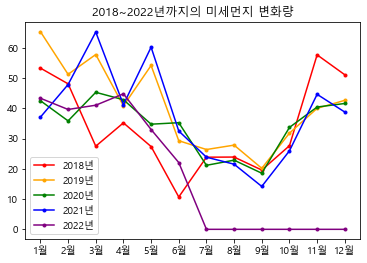

In [84]:
# 2018~2022년 월별 미세먼지 변화량 선그래프

# 2018년 그래프
plt.plot(pd.DataFrame(dust_avg_2018, index=[str(i)+'월' for i in range(1, 13)]),    # marker는 선그래프 꺾일 때마다 찍히는 동그라미
        marker='o', ms=3, color='red')                                              # ms는 marker 크기

# 2019년 그래프
plt.plot(pd.DataFrame(dust_avg_2019, index=[str(i)+'월' for i in range(1, 13)]),
        marker='o', ms=3, color='orange')

# 2020년 그래프
plt.plot(pd.DataFrame(dust_avg_2020, index=[str(i)+'월' for i in range(1, 13)]),
        marker='o', ms=3, color='green')

# 2021년 그래프
plt.plot(mean_2021, marker='o', ms=3, color='blue')

# 2022년 그래프
plt.plot(mean_2022, marker='o', ms=3, color='purple')


# 그래프 제목
plt.title('2018~2022년까지의 미세먼지 변화량')

# 범례 설정
plt.legend(['2018년', '2019년', '2020년','2021년', '2022년'])


In [80]:
# 뒤에서 그래프 그릴 때 mean_2022에는 값이 6개뿐이어서 
# 나머지 년도의 개수(12개)와 맞지 않아서 오류가 발생
# 그래서 mean_2022 리스트에도 개수를 맞추기 위해 0을 6개 추가
for i in range(6):
    mean_2022.append(0)

In [81]:
# 각 연도별 평균
all_avg=[avg_2012, avg_2013, avg_2014, avg_2015, avg_2016, avg_2017, avg_2018, avg_2019, avg_2020, avg_2021, avg_2022]
all_avg

[40.99626666666666,
 44.37276666666667,
 45.36673333333332,
 45.1174,
 46.52182795698925,
 42.84688172043011,
 33.81134546457127,
 40.608987844787286,
 34.55483870967742,
 37.73686666666666,
 37.29606666666667]

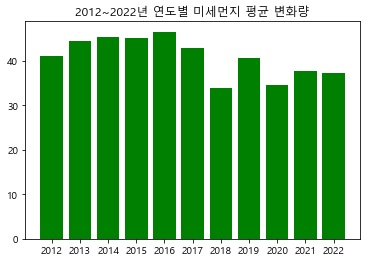

In [82]:
# 2012~2022년 연도별 미세먼지 평균 변화량 막대그래프

import numpy as np
x=np.arange(11)
years=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

ax=plt.subplot()

plt.bar(x, all_avg, color='green')
plt.title('2012~2022년 연도별 미세먼지 평균 변화량')
ax.set_xticks(x, years)

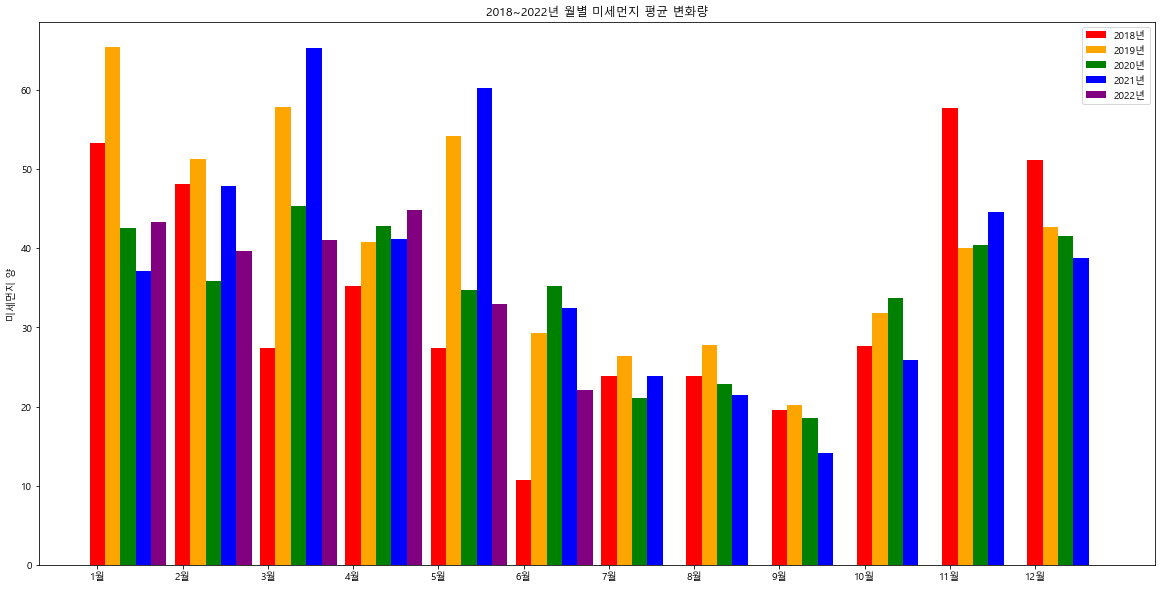

In [83]:
# 2018~2022년 월별 미세먼지 평균 변화량 막대그래프

import numpy as np

my_labels=[str(i)+'월' for i in range(1, 13)]
x=np.arange(12)
bar_width=0.18
my_width=0.18

fig, ax=plt.subplots(figsize=(20, 10))

graph1=ax.bar(x, dust_avg_2018, bar_width, color='red')
graph2=ax.bar(x+my_width, dust_avg_2019, bar_width, color='orange')
graph3=ax.bar(x+my_width*2, dust_avg_2020, bar_width, color='green')
graph4=ax.bar(x+my_width*3, mean_2021, bar_width, color='blue')
graph5=ax.bar(x+my_width*4, mean_2022, bar_width, color='purple')

ax.set_xticks(x, my_labels)
ax.set_ylabel('미세먼지 양')
ax.set_title('2018~2022년 월별 미세먼지 평균 변화량')
ax.legend(['2018년', '2019년', '2020년', '2021년', '2022년'])
plt.show()
